In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import signal
from matplotlib.pyplot import figure
import scipy
import copy

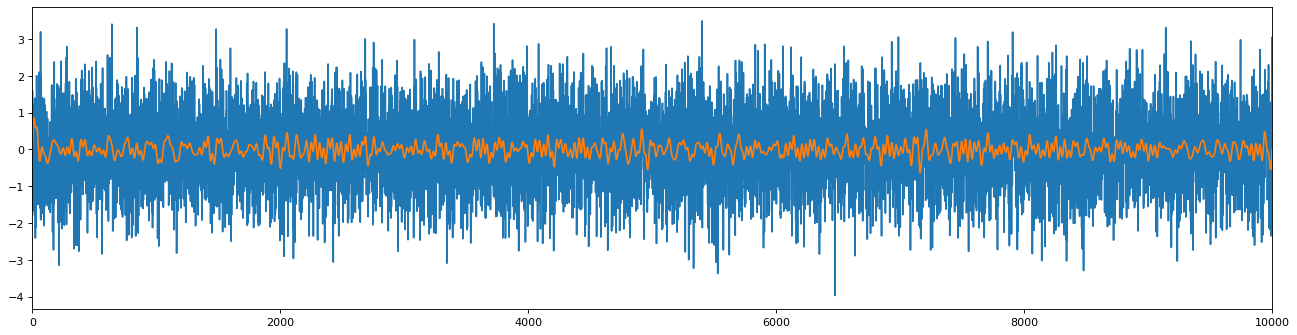

In [2]:
signal_content = sio.loadmat('filtering_codeChallenge.mat')

sampleRate = signal_content['fs']
time = np.arange(0,10000, 1)
sig = signal_content['x'].transpose()[0]
signalAnswers = signal_content['y']
signalAnswers = np.array(signalAnswers.transpose()[0])

figure(figsize=(20, 5), dpi=80)
plt.plot(sig)
plt.plot(signalAnswers)
plt.xlim(0,10000)
plt.show()

(10000,)
(1,)


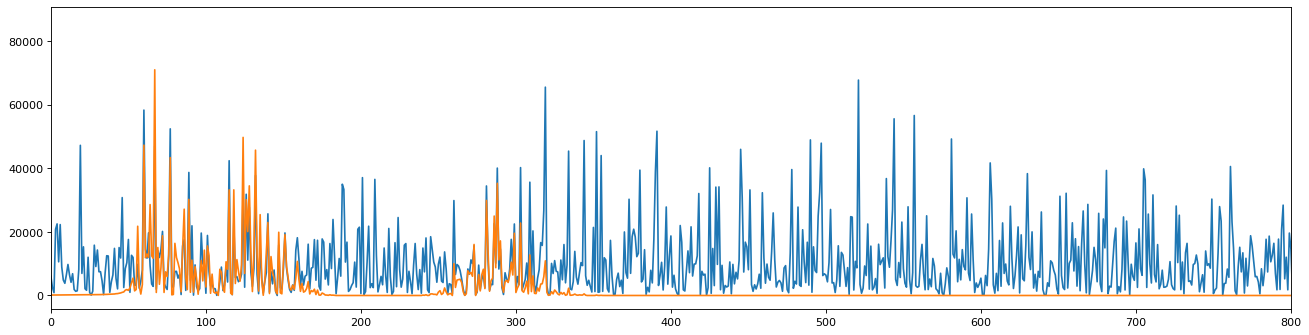

In [3]:
#Frequency analysis
print(np.shape(np.abs(scipy.fft.fft(sig))))
print(np.shape(np.linspace(0,100,1)))

frequenciesSig = np.abs(scipy.fft.fft(sig))**2
frequenciesAnsw = np.abs(scipy.fft.fft(signalAnswers))**2

figure(figsize=(20, 5), dpi=80)
plt.plot(frequenciesSig)
plt.plot(frequenciesAnsw)
plt.xlim(0,800)
plt.show()

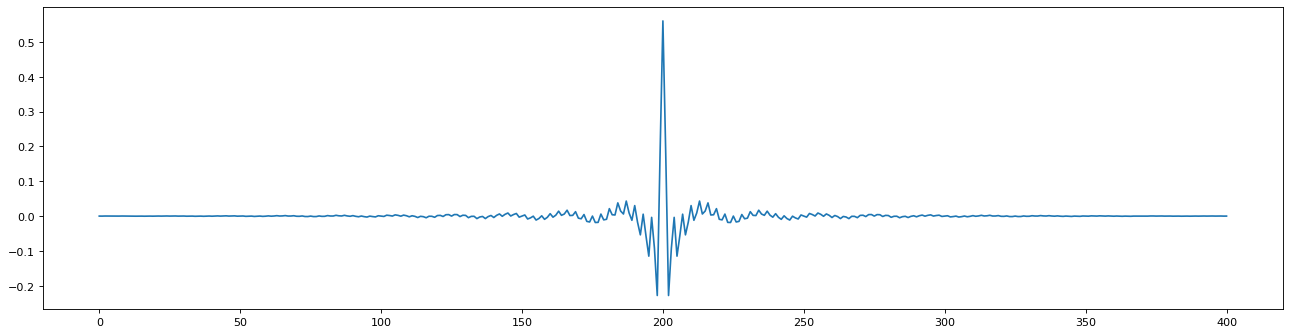

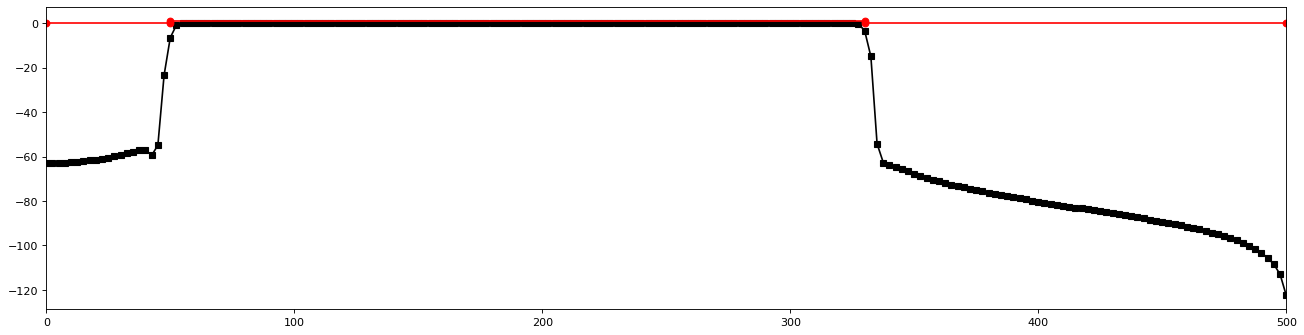

In [4]:
# need round off limits
# First limit from 50 to 160
# Second limit from 250 to 330
# Filter the outter range of the signal.
srate   = 1000 # hz
nyquist = srate/2
frange  = [50,330]
transw  = .1
order   = int( 20*srate/frange[0] )
if order%2==0:
    order += 1

filtkern = signal.firwin(order,frange,fs=srate,pass_zero=False)

figure(figsize=(20, 5), dpi=80)
plt.plot(filtkern)
plt.show()

filtpow = np.abs(scipy.fft.fft(filtkern))**2

hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]

figure(figsize=(20, 5), dpi=80)
plt.plot(hz,10*np.log10(filtpow),'ks-',label='Actual')
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'ro-',label='Ideal')
plt.xlim(0,500)
plt.show()

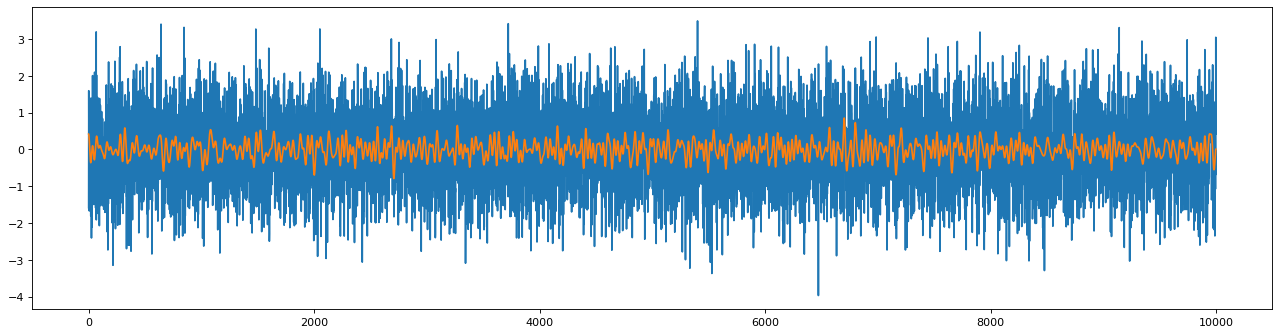

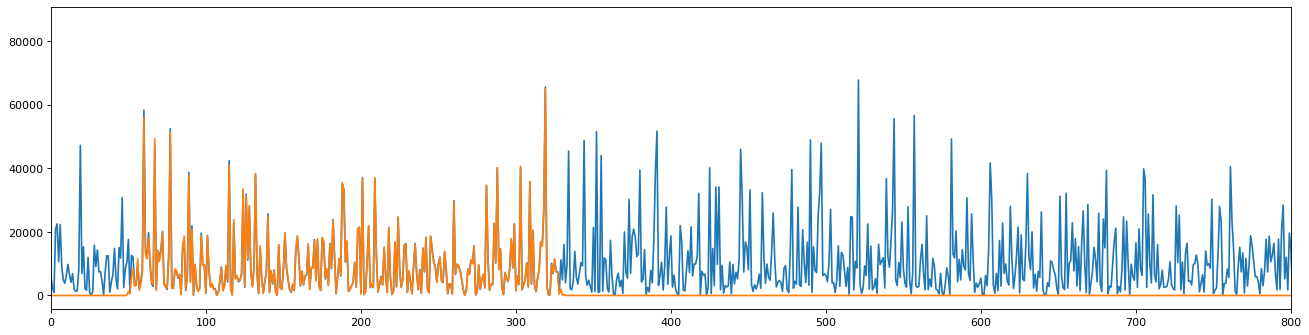

In [5]:
srate   = 1000 # hz
nyquist = srate/2
frange  = [5,33] # Reduced by factor of 10
transw  = .1
order   = int( 20*srate/frange[0] )
if order%2==0:
    order += 1

filtkern = signal.firwin(order,frange,fs=srate,pass_zero=False)

fdata = np.concatenate( (sig[order:0:-1],sig,sig[-1:-1-order:-1]) ,axis=0)

fdata = signal.filtfilt(filtkern,1,fdata)


# Doesnt work for some reason
# reflectdata = signal.lfilter(filtkern,1,fdata)
# reflectdata = signal.lfilter(filtkern,1,reflectdata[::-1])
# reflectdata = reflectdata[::-1]

# Chop off unneeded
fdata = fdata[order:-order]

figure(figsize=(20, 5), dpi=80)
plt.plot(sig)
plt.plot(fdata)
plt.show()

frequenciesFiltered = np.abs(scipy.fft.fft(fdata))**2
frequenciesSig = np.abs(scipy.fft.fft(sig))**2

figure(figsize=(20, 5), dpi=80)
plt.plot(frequenciesSig)
plt.plot(frequenciesFiltered)
plt.xlim(0,800)
plt.show()


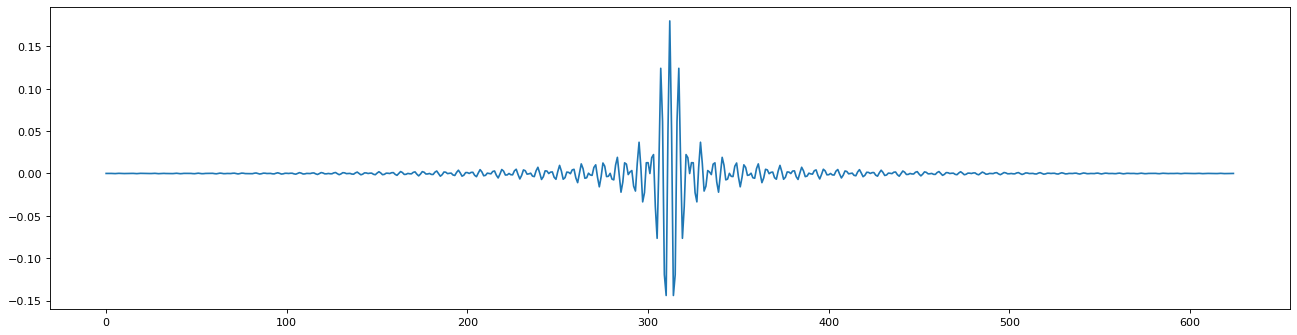

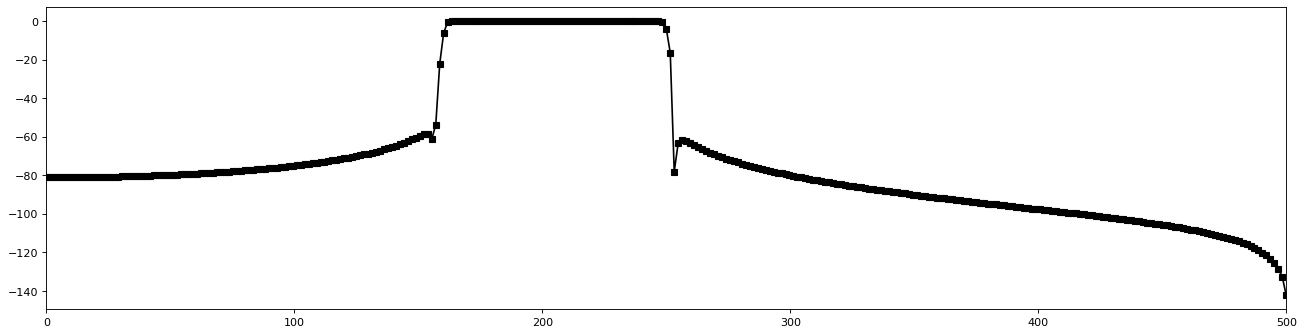

In [6]:
srate   = 1000 # hz
nyquist = srate/2
frange  = [160,250]
transw  = .1
order   = int( 100*srate/frange[0] )
if order%2==0:
    order += 1

filtkern = signal.firwin(order,frange,fs=srate,pass_zero=False)

figure(figsize=(20, 5), dpi=80)
plt.plot(filtkern)
plt.show()

filtpow = np.abs(scipy.fft.fft(filtkern))**2

hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]

figure(figsize=(20, 5), dpi=80)
plt.plot(hz,10*np.log10(filtpow),'ks-',label='Actual')
# plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'ro-',label='Ideal')
plt.xlim(0,500)
plt.show()

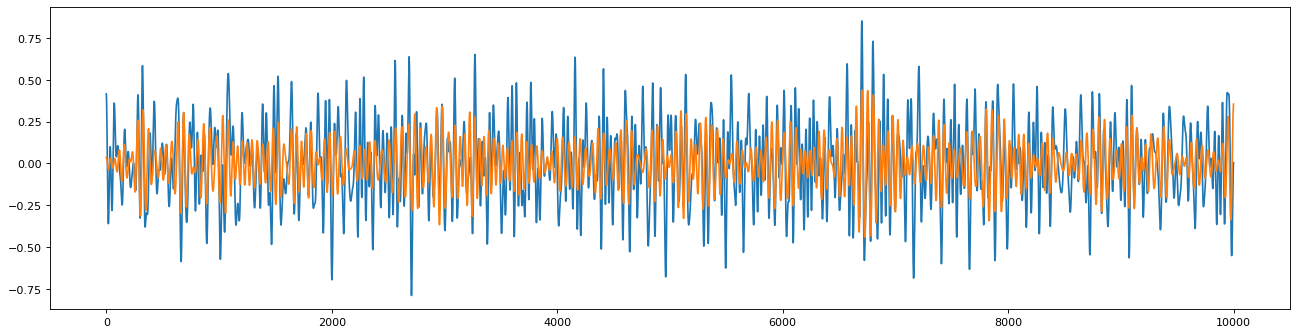

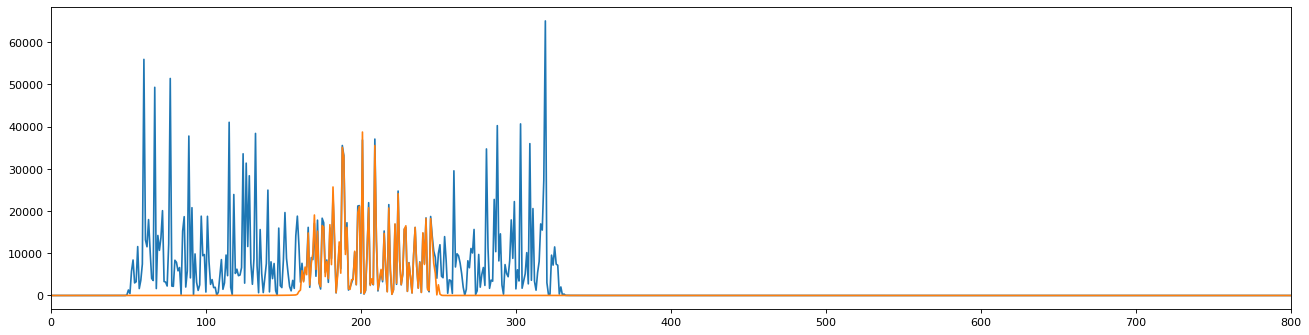

In [7]:
srate   = 1000 # hz
nyquist = srate/2
frange  = [16,25]
transw  = .1
order   = int( 100*srate/frange[0] )
if order%2==0:
    order += 1

filtkern = signal.firwin(order,frange,fs=srate,pass_zero=False)


fdata2 = np.concatenate( (fdata[order:0:-1],fdata,fdata[-1:-1-order:-1]) ,axis=0)

fdata2 = signal.filtfilt(filtkern,1,fdata2)


# Doesnt work for some reason
# reflectdata = signal.lfilter(filtkern,1,fdata)
# reflectdata = signal.lfilter(filtkern,1,reflectdata[::-1])
# reflectdata = reflectdata[::-1]

# Chop off unneeded
fdata2 = fdata2[order:-order]

figure(figsize=(20, 5), dpi=80)
plt.plot(fdata)
plt.plot(fdata2)
plt.show()

frequenciesFiltered = np.abs(scipy.fft.fft(fdata2))**2
frequenciesSig = np.abs(scipy.fft.fft(fdata))**2

figure(figsize=(20, 5), dpi=80)
plt.plot(frequenciesSig)
plt.plot(frequenciesFiltered)
plt.xlim(0,800)
plt.show()

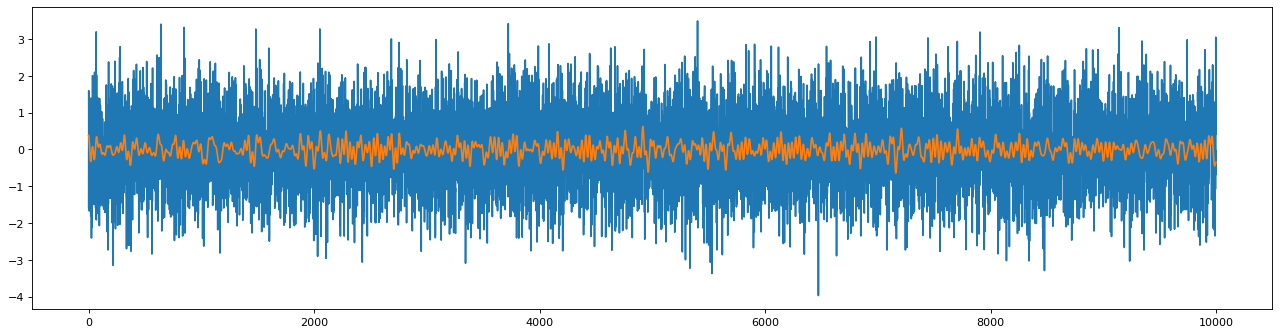

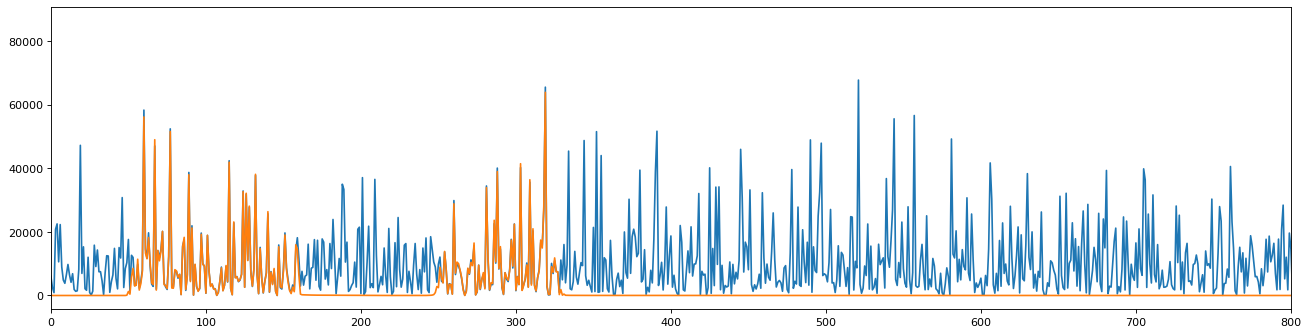

In [8]:
fdataFinal = fdata - fdata2

figure(figsize=(20, 5), dpi=80)
plt.plot(sig)
# plt.plot(fdata)
plt.plot(fdataFinal)
plt.show()

frequenciesFiltered = np.abs(scipy.fft.fft(fdataFinal))**2
frequenciesSig = np.abs(scipy.fft.fft(sig))**2
frequenciesSig2 = np.abs(scipy.fft.fft(fdata))**2


figure(figsize=(20, 5), dpi=80)
plt.plot(frequenciesSig)
# plt.plot(frequenciesSig2)
plt.plot(frequenciesFiltered)
plt.xlim(0,800)
plt.show()